This notebook checks the robustness of the position of Ctenophora to variation in locus entropy and gap score. The data is taken from [Whelan et al. 2015](http://www.pnas.org/content/112/18/5773.abstract).

In [1]:
from reprophylo import *

In [27]:
if not os.path.exists('../data/Whelan2015/Final_Datasets/12/fastaalns'):
    os.mkdir('../data/Whelan2015/Final_Datasets/12/fastaalns')
    
fasta_dir = '../data/Whelan2015/Final_Datasets/12/fastaalns'

Partition information is provided in a manner that requires some tweeks to the standard functions in ReproPhylo.

In [35]:
def parse_whelan15_partitions(raxml_partition_file):
    """
    input:
    locus_name1 = start_pos-end_pos;
    locus_name2 = start_pos-end_pos;
    
    returns:
    {locus_name1: [start_pos,end_pos],
     locus_name2: [start_pos,end_pos]}
    """
    with open(raxml_partition_file) as partfile:
        lines = partfile.readlines()
        parts = {}
        for line in lines:
            locus, start, end = line.rstrip()[:-1].replace(' = ',' ').replace('-',' ').split()
            start, end = int(start)-1, int(end)
            locus = locus.split('.')[0]
            parts[locus] = [start, end]
        return parts
    

def pj_from_phylip(phylip_filename, charsets ,output_dir, char_type,
                            feature_type, project=False, pickle=False, git=False):
    
    """
    Takes a phylip file with a supermatrix and a charsets dictionary produced by 
    parse_whelan15_partitions.
    
    Returns a Project object with per locus (partition) records and alignments
    """
    
    
    from reprophylo import Locus
    from Bio import AlignIO
    
    alignment =  AlignIO.read(phylip_filename, 'phylip-relaxed')
    filenames = []
    loci_list = []
    for locus_name in charsets:
        s = charsets[locus_name][0]
        e = charsets[locus_name][1]
        outname = "%s/%s.fasta"%(output_dir,locus_name)
        AlignIO.write(alignment[:, s:e], outname, 'fasta')
        filenames.append(outname)
        loci_list.append(Locus(char_type, feature_type, locus_name, [locus_name]))
    
    if project:
        from reprophylo import Project
        pj = Project(loci_list, pickle=pickle, git=git)
        i=1
        for f in filenames:
            locus_name = f.split('/')[-1].split('.')[0]
            print '%i/%i reading %s'%(i,len(filenames), locus_name)
            i += 1
            pj.read_alignment(f, char_type, feature_type, locus_name)
        return pj
            
    else:  
        return filenames, loci_list

path to inputs:

In [33]:
partition_file = '../data/Whelan2015/Final_Datasets/12/Dataset12_GeneList_UncertainPruned.txt'
phylip_file = '../data/Whelan2015/Final_Datasets/12/Dataset12_UncertainPruned.phy'

create a Project

In [36]:
charsets = parse_whelan15_partitions(partition_file)
pj = pj_from_phylip(phylip_file, 
                    charsets,
                    fasta_dir,
                    'prot',
                    'PROT',
                    project=True,
                    pickle='Whelan2015_Dataset12_UncertainPruned',
                    git=True)

/home/amir/Dropbox/python_modules/rpgit.py:74: UserWarning: Thanks to Stack-Overflow users Shane Geiger and Billy Jin for the git wrappers code
  warnings.warn('Thanks to Stack-Overflow users Shane Geiger and Billy Jin for the git wrappers code')
/home/amir/Dropbox/python_modules/rpgit.py:90: UserWarning: A git repository was created in /home/amir/Dropbox/basal_metazoa/Whelan2015_dataset12.
  warnings.warn('A git repository was created in %s.'%repoDir)
/home/amir/Dropbox/python_modules/reprophylo.py:255: UserWarning: The new repository is called Whelan2015_Dataset12_UncertainPruned.
  warnings.warn('The new repository is called %s.'%open(cwd + '/.git/description', 'r').read().rstrip())
DEBUG:Cloud:Log file (/home/amir/.picloud/cloud.log) opened


1/209 reading Gene_0969
dropping seq Gene_0969 in locus Aurelia_aurita: missing data
dropping seq Gene_0969 in locus Acanthoeca_spectabilis: missing data
dropping seq Gene_0969 in locus Bolocera_tuediae: missing data
dropping seq Gene_0969 in locus Rossella_fibulata: missing data
dropping seq Gene_0969 in locus Dryodora_glandiformis: missing data
dropping seq Gene_0969 in locus Euplokamis_dunlapae: missing data
dropping seq Gene_0969 in locus Daphnia_pulex: missing data
dropping seq Gene_0969 in locus Pleurobrachia_atlantica: missing data
dropping seq Gene_0969 in locus Petrosia_ficiformis: missing data
dropping seq Gene_0969 in locus Physalia_physalis: missing data
dropping seq Gene_0969 in locus Corticium_candelabrum: missing data
dropping seq Gene_0969 in locus Nanomia_bijuga: missing data
dropping seq Gene_0969 in locus Sympagella_nux: missing data
dropping seq Gene_0969 in locus Monosiga_ovata: missing data
dropping seq Gene_0969 in locus Mnemiopsis_leidyi: missing data
dropping s

The alignments were placed in `pj.alignments`. To populate `pj.trimmed_alignments` we do this:

In [37]:
# mock trimming
trimal = TrimalConf(pj, method_name='noallgaps', trimal_commands={'noallgaps': True})

trimal -in 287701433189457.55_Gene_0064@ReadDirectly.fasta -noallgaps
trimal -in 287701433189457.55_Gene_1004@ReadDirectly.fasta -noallgaps
trimal -in 287701433189457.55_Gene_0272@ReadDirectly.fasta -noallgaps
trimal -in 287701433189457.55_Gene_0242@ReadDirectly.fasta -noallgaps
trimal -in 287701433189457.55_Gene_0384@ReadDirectly.fasta -noallgaps
trimal -in 287701433189457.55_Gene_0086@ReadDirectly.fasta -noallgaps
trimal -in 287701433189457.55_Gene_0933@ReadDirectly.fasta -noallgaps
trimal -in 287701433189457.55_Gene_0323@ReadDirectly.fasta -noallgaps
trimal -in 287701433189457.55_Gene_0629@ReadDirectly.fasta -noallgaps
trimal -in 287701433189457.55_Gene_0415@ReadDirectly.fasta -noallgaps
trimal -in 287701433189457.55_Gene_0058@ReadDirectly.fasta -noallgaps
trimal -in 287701433189457.55_Gene_0328@ReadDirectly.fasta -noallgaps
trimal -in 287701433189457.55_Gene_0912@ReadDirectly.fasta -noallgaps
trimal -in 287701433189457.55_Gene_0325@ReadDirectly.fasta -noallgaps
trimal -in 287701433

In [ ]:
pj.trim([trimal])

Sort te loci by their mean entropy

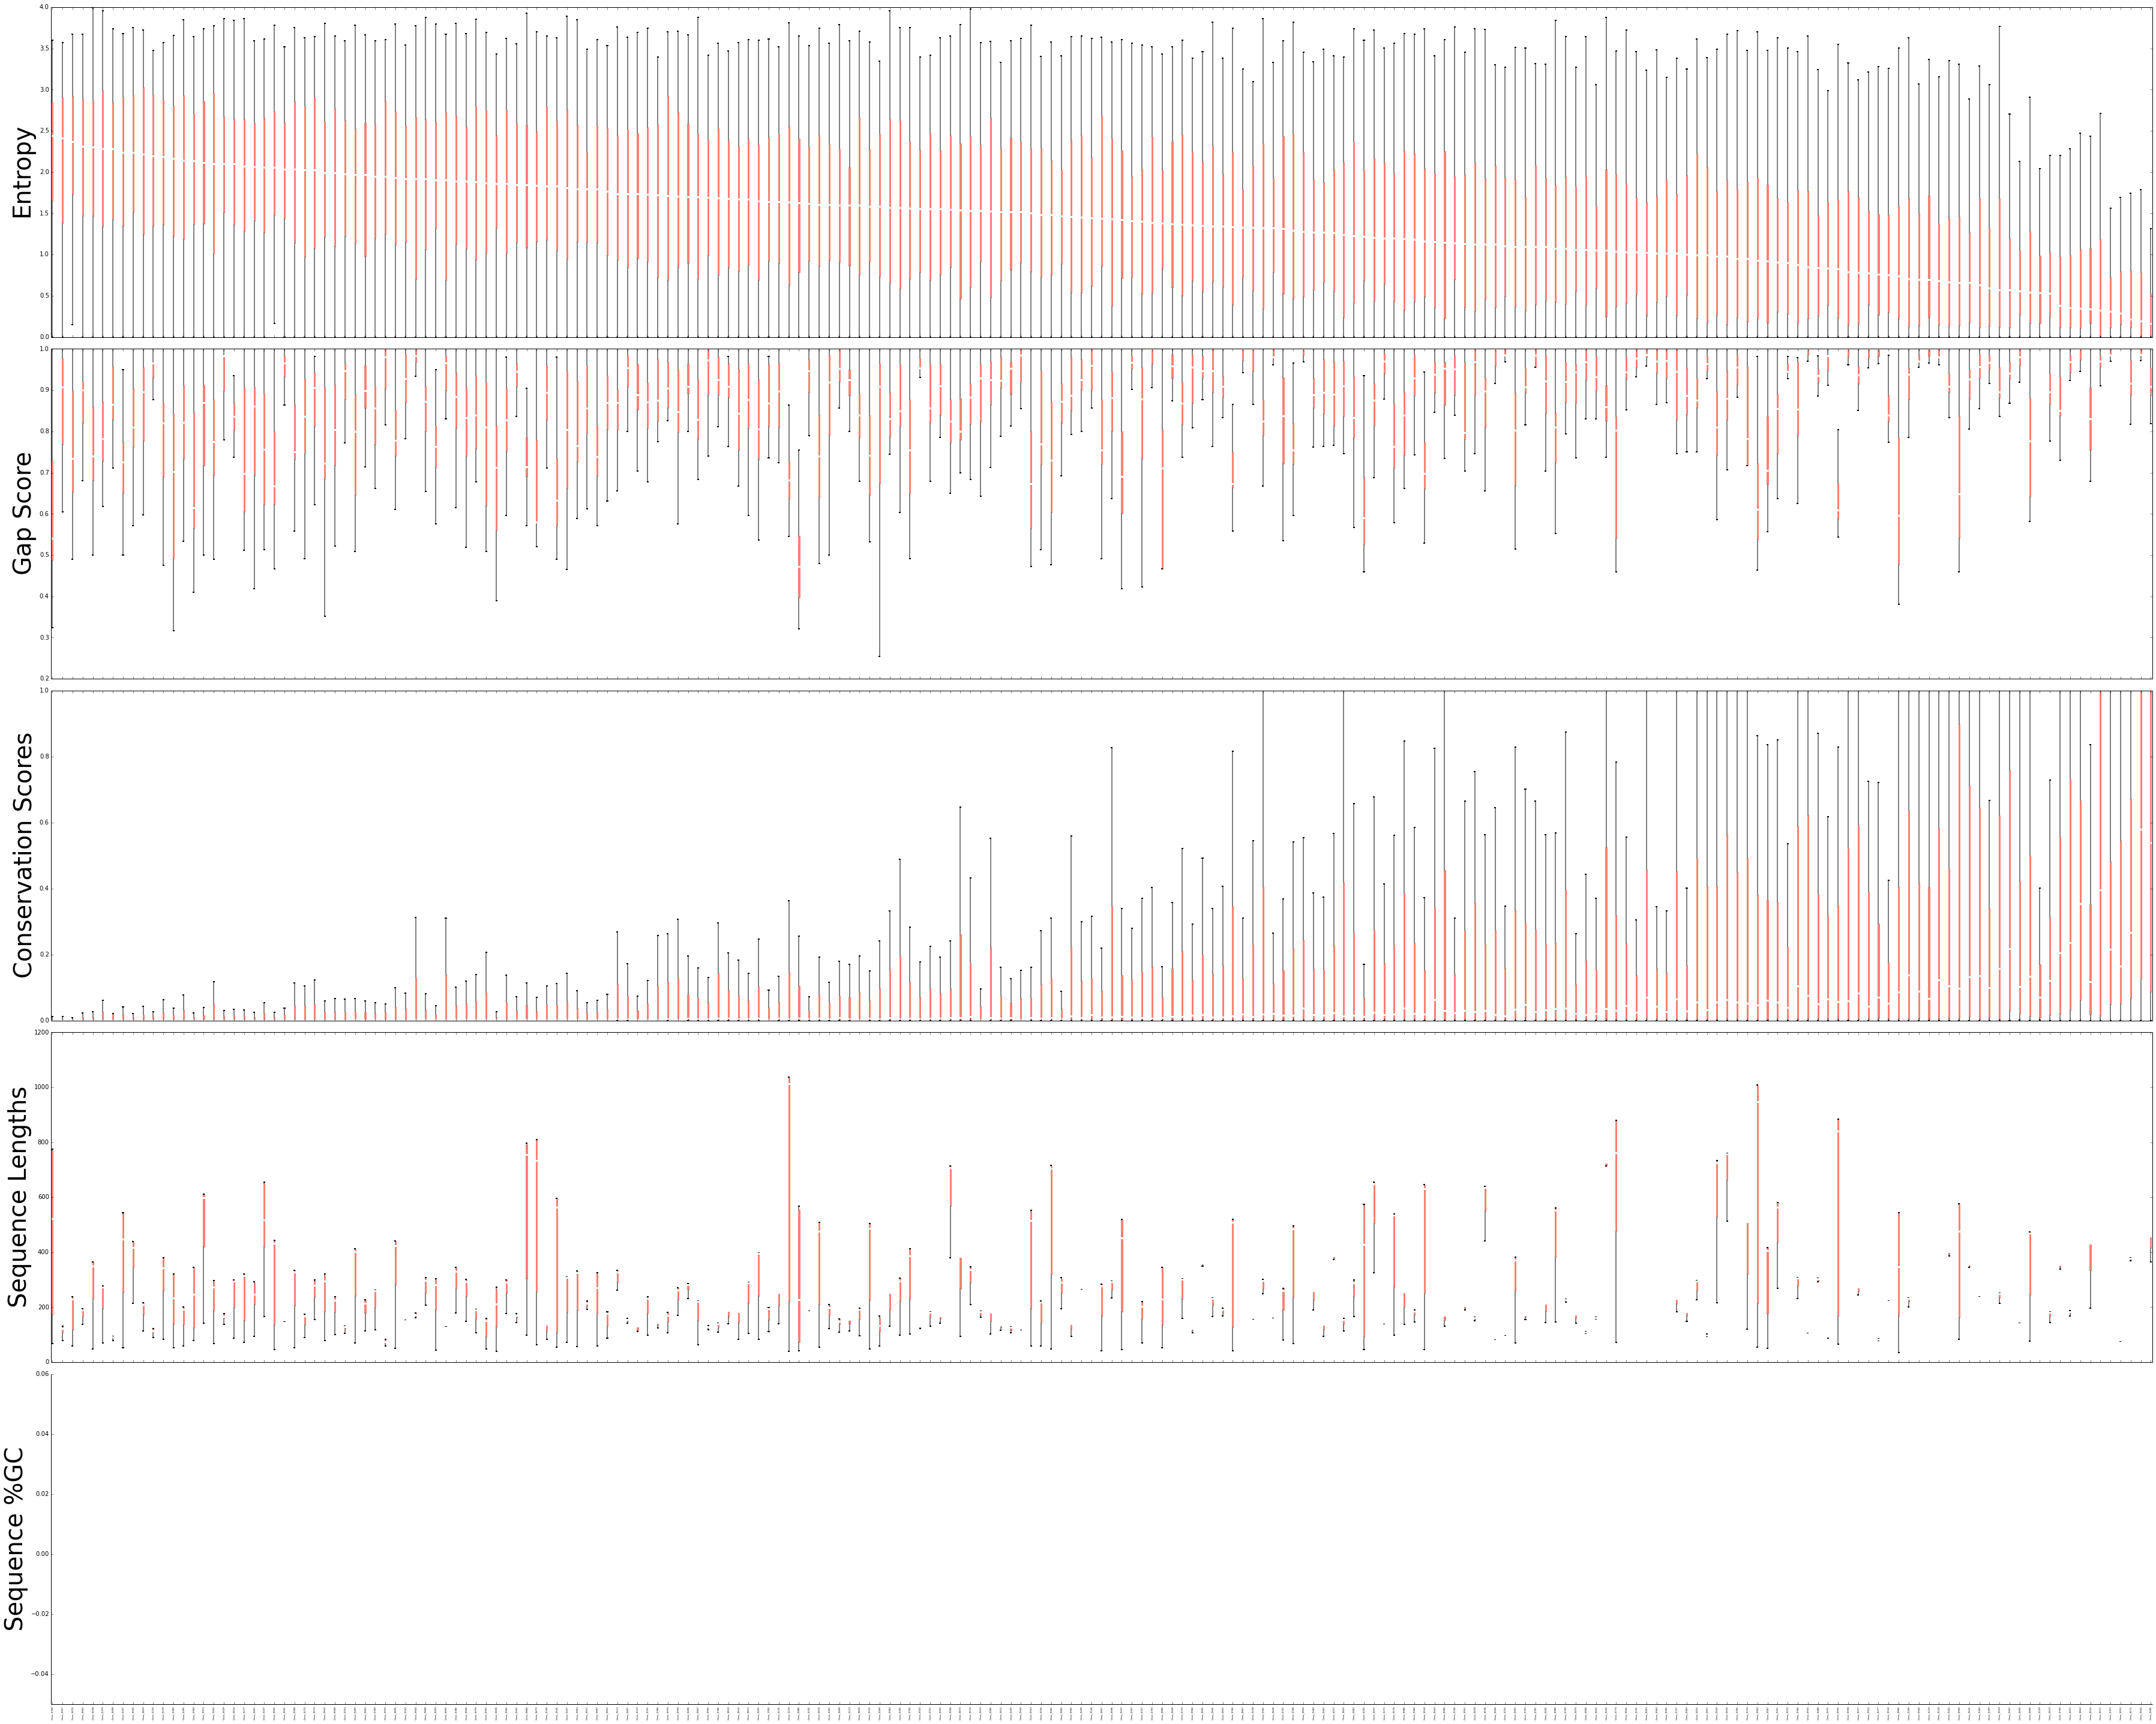

In [49]:
loci_entropy = LociStats(pj)
loci_entropy.sort()
%matplotlib inline
loci_entropy.plot('figures/sort_by_entropy.png', figsize=[50,40])

sort the loci by their gap score

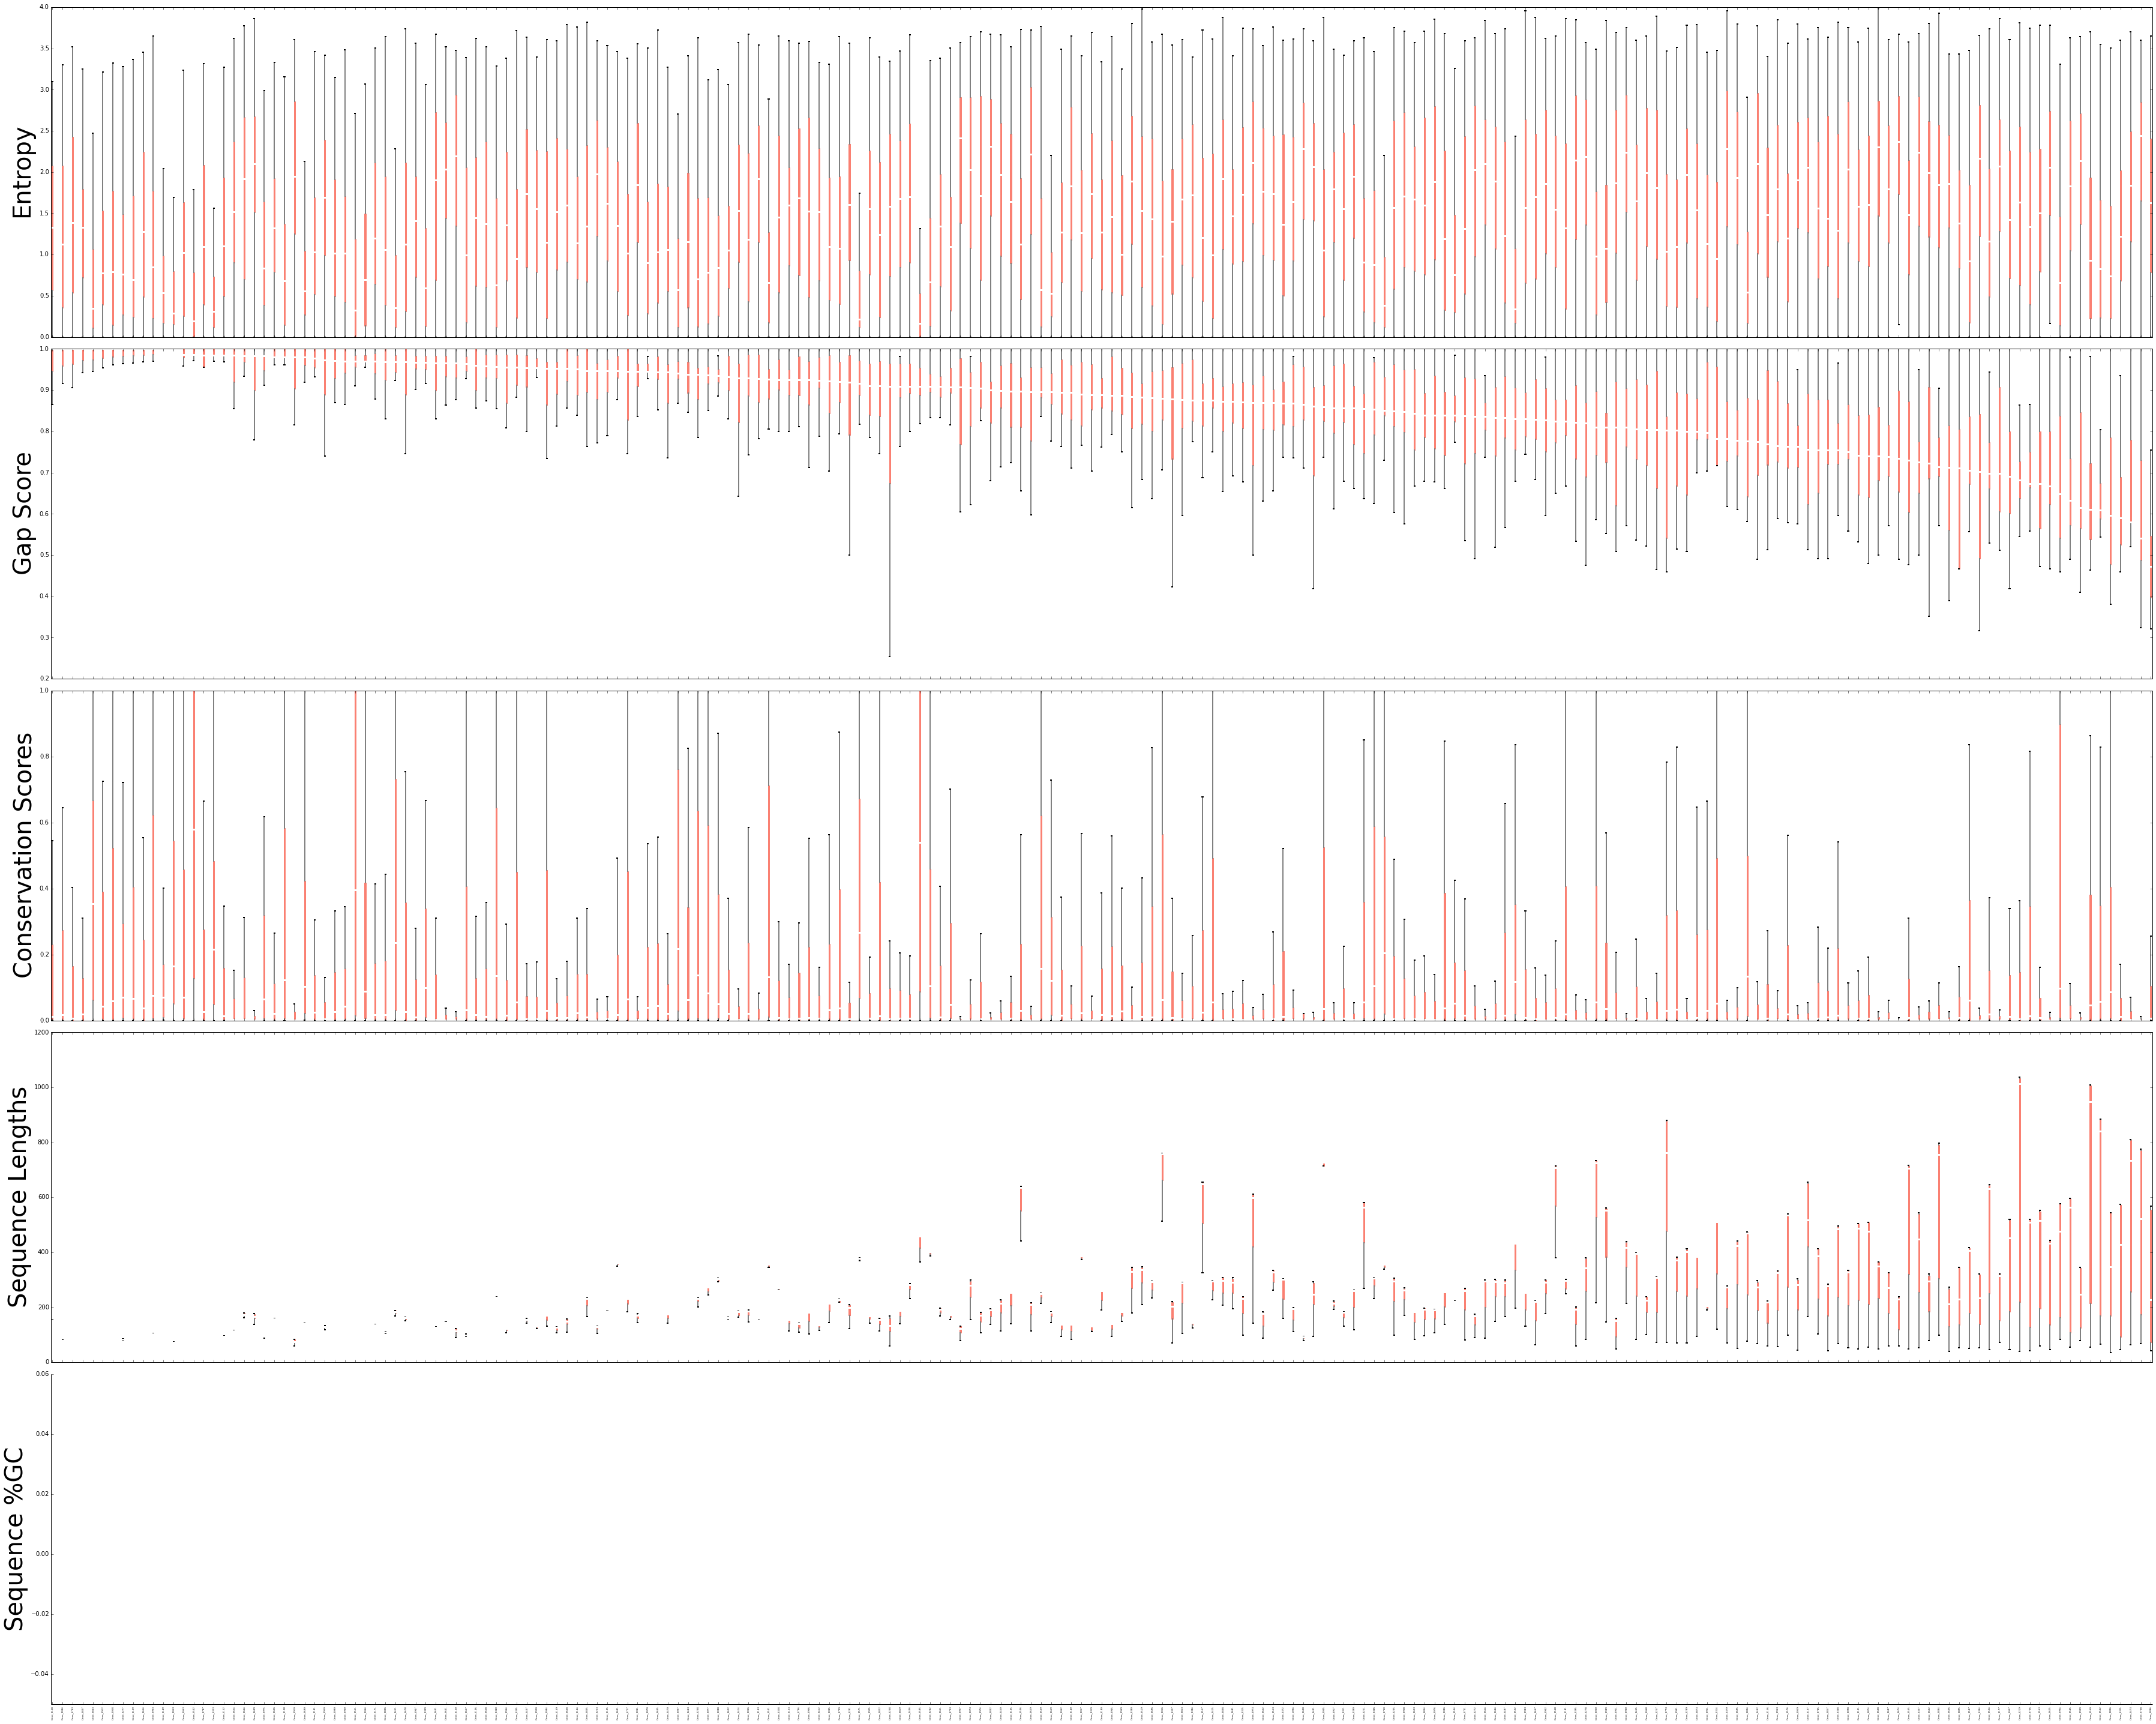

In [51]:
loci_gap = LociStats(pj)
loci_gap.sort(parameter='gapscore')
loci_gap.plot('figures/sort_by_gapscore.png', figsize=[50,40])

Subset the original supermatrix into 50 loci chunks based on entropy and gap-scores

In [60]:
supermatrices = loci_entropy.slide_loci('source_original_id', length=50, step=50)

entropy_2.44_1.83_loci_0_to_49
entropy_1.83_1.48_loci_50_to_99
entropy_1.47_1.07_loci_100_to_149
entropy_1.07_0.38_loci_150_to_199


In [61]:
supermatrices += loci_entropy.slide_loci('source_original_id', length=50, step=50, parameter='gapscore')

gapscore_0.54_0.89_loci_0_to_49
gapscore_0.63_0.73_loci_50_to_99
gapscore_0.87_0.81_loci_100_to_149
gapscore_0.92_0.85_loci_150_to_199


Produce supermatrix subsets

In [62]:
for c in supermatrices:
    pj.add_concatenation(c)

In [63]:
pj.make_concatenation_alignments()

Concatenation entropy_2.44_1.83_loci_0_to_49 will have the following data
OTU                           Gene_0120           Gene_0930           Gene_0641           Gene_0473           Gene_0910           Gene_0442           Gene_0098           Gene_0395           Gene_0394           Gene_0390           Gene_0253           Gene_0909           Gene_0380           Gene_0143           Gene_0140           Gene_0068           Gene_0177           Gene_0674           Gene_0644           Gene_0278           Gene_0272           Gene_0073           Gene_0379           Gene_0921           Gene_0608           Gene_0927           Gene_0601           Gene_0289           Gene_0768           Gene_0041           Gene_0802           Gene_0808           Gene_0614           Gene_0884           Gene_0695           Gene_0401           Gene_0059           Gene_0942           Gene_0625           Gene_0629           Gene_0107           Gene_0450           Gene_0973           Gene_0636           Gene_0632       

Build the trees

In [64]:
concat_names = [c.name for c in pj.concatenations]

In [66]:
raxml = RaxmlConf(pj, alns=concat_names, preset='fD_fb', method_name='fD_fb')

raxmlHPC-PTHREADS-SSE3 -f D -m PROTGAMMAJTT -n 802761433193085.89_gapscore_0.54_0.89_loci_0_to_490 -q 802761433193085.89_gapscore_0.54_0.89_loci_0_to_49_partfile -p 284 -s 802761433193085.89_gapscore_0.54_0.89_loci_0_to_49.fasta -T 4 -N 1
raxmlHPC-PTHREADS-SSE3 -f b -m PROTGAMMAJTT -n 802761433193085.89_gapscore_0.54_0.89_loci_0_to_491 -q 802761433193085.89_gapscore_0.54_0.89_loci_0_to_49_partfile -p 802 -s 802761433193085.89_gapscore_0.54_0.89_loci_0_to_49.fasta -t RAxML_bestTree.802761433193085.89_gapscore_0.54_0.89_loci_0_to_490 -T 4 -z RAxML_rellBootstrap.802761433193085.89_gapscore_0.54_0.89_loci_0_to_490
raxmlHPC-PTHREADS-SSE3 -f D -m PROTGAMMAJTT -n 802761433193085.89_gapscore_0.92_0.85_loci_150_to_1990 -q 802761433193085.89_gapscore_0.92_0.85_loci_150_to_199_partfile -p 99 -s 802761433193085.89_gapscore_0.92_0.85_loci_150_to_199.fasta -T 4 -N 1
raxmlHPC-PTHREADS-SSE3 -f b -m PROTGAMMAJTT -n 802761433193085.89_gapscore_0.92_0.85_loci_150_to_1991 -q 802761433193085.89_gapscore_0.

In [67]:
pj.tree([raxml])

In [69]:
print (pj.last_git_log())


Wed Jun  3 13:20:30 2015
STDOUT:
[master 810382d] RaxmlConf named fD_fb with ID 802761433193085.89 Alignments: gapscore_0.54_0.89_loci_0_to_49,gapscore_0.92_0.85_loci_150_to_199,entropy_2.44_1.83_loci_0_to_49,entropy_1.07_0.38_loci_150_to_199,entropy_1.83_1.48_loci_50_to_99,entropy_1.47_1.07_loci_100_to_149,gapscore_0.87_0.81_loci_100_to_149,gapscore_0.63_0.73_loci_50_to_99 Created on: Mon Jun  1 22:11:25 2015 Commands: gapscore_0.54_0.89_loci_0_to_49: raxmlHPC-PTHREADS-SSE3 -f D -m PROTGAMMAJTT -n 802761433193085.89_gapscore_0.54_0.89_loci_0_to_490 -q 802761433193085.89_gapscore_0.54_0.89_loci_0_to_49_partfile -p 284 -s 802761433193085.89_gapscore_0.54_0.89_loci_0_to_49.fasta -T 4 -N 1 raxmlHPC-PTHREADS-SSE3 -f b -m PROTGAMMAJTT -n 802761433193085.89_gapscore_0.54_0.89_loci_0_to_491 -q 802761433193085.89_gapscore_0.54_0.89_loci_0_to_49_partfile -p 802 -s 802761433193085.89_gapscore_0.54_0.89_loci_0_to_49.fasta -t RAxML_bestTree.802761433193085.89_gapscore_0.54_0.89_loci_0_to_490 -T 4

add phyla qualifiers to the records

In [74]:
phyla = {  'Abylopsis_tetragona':'Cnidaria',
             'Acanthoeca_spectabilis':'Choanoflagellata',
             'Acropora_digitifera':'Cnidaria',
             'Agalma_elegans':'Cnidaria',
             'Aiptasia_pallida':'Cnidaria',
             'Allomyces_macrogynus': 'Fungi',
             'Amoebidium_parasiticum':'Ichthyosporea',
             'Amphimedon_queenslandica':'Porifera',
             'Aphrocallistes_vastus':'Porifera',
             'Aspergillus_fumigatus': 'Fungi',
             'Aurelia_aurita':'Cnidaria',
             'Beroe_abyssicola':'Ctenophora',
             'Bolinopsis_infundibulum':'Ctenophora',
             'Bolocera_tuediae':'Cnidaria',
             'Capitella_teleta':'Bilateria',
             'Capsaspora_owczarzaki':'Ichthyosporea',
             'Chondrilla_nucula':'Porifera',
             'Coeloplana_astericola':'Ctenophora',
             'Corticium_candelabrum':'Porifera',
             'Craseoa_lathetica':'Cnidaria',
             'Crella_elegans':'Porifera',
             'Danio_rerio':'Bilateria',
             'Daphnia_pulex':'Bilateria',
             'Drosophila_melanogaster':'Bilateria',
             'Dryodora_glandiformis':'Ctenophora',
             'Ephydatia_muelleri':'Porifera',
             'Eunicella_verrucosa':'Cnidaria',
             'Euplokamis_dunlapae':'Ctenophora',
             'Hemithiris_psittacea':'Bilateria',
             'Homo_sapiens':'Bilateria',
             'Hormathia_digitata':'Cnidaria',
             'Hyalonema_populiferum':'Porifera',
             'Hydra_oligactis':'Cnidaria',
             'Hydra_viridissima':'Cnidaria',
             'Hydra_vulgaris':'Cnidaria',
             'Ircinia_fasciculata':'Porifera',
             'Kirkpatrickia_variolosa':'Porifera',
             'Latrunculia_apicalis':'Porifera',
             'Lithobius_forficatus':'Bilateria',
             'Lottia_gigantea':'Bilateria',
             'Mertensiidae_sp':'Ctenophora',
             'Ministeria_vibrans':'Ichthyosporea',
             'Mnemiopsis_leidyi':'Ctenophora',
             'Monosiga_brevicollis':'Choanoflagellata',
             'Monosiga_ovata':'Choanoflagellata',
             'Mortierella_verticillata':'Fungi',
             'Nanomia_bijuga':'Cnidaria',
             'Nematostella_vectensis':'Cnidaria',
             'Neurospora_crassa':'Fungi',
             'Oscarella_carmela':'Porifera',
             'Periphylla_periphylla':'Cnidaria',
             'Petromyzon_marinus':'Bilateria',
             'Petrosia_ficiformis':'Porifera',
             'Physalia_physalis':'Cnidaria',
             'Platygyra_carnosa':'Cnidaria',
             'Pleurobrachia_atlantica':'Ctenophora',
             'Pleurobrachia_bachei':'Ctenophora',
             'Priapulus_caudatus':'Bilateria',
             'Pseudospongosorites_suberitoides':'Porifera',
             'Rhizopus_oryzae':'Fungi',
             'Rossella_fibulata':'Porifera',
             'Saccharomyces_cerevisiae':'Fungi',
             'Saccoglossus_kowalevskii':'Bilateria',
             'Salpingoeca_pyxidium':'Choanoflagellata',
             'Salpingoeca_rosetta':'Choanoflagellata',
             'Sphaeroforma_arctica':'Ichthyosporea',
             'Spizellomyces_punctatus':'Fungi',
             'Spongilla_alba':'Porifera',
             'Strongylocentrotus_purpuratus':'Bilateria',
             'Sycon_ciliatum':'Porifera',
             'Sycon_coactum':'Porifera',
             'Sympagella_nux':'Porifera',
             'Tethya_wilhelma':'Porifera',
             'Trichoplax_adhaerens':'Placozoa',
             'Tubulanus_polymorphus':'Bilateria',
             'Vallicula_sp':'Ctenophora'}

In [76]:
pj.add_qualifier_from_source('original_id')
for sp in phyla:
    pj.if_this_then_that(sp,'original_id',phyla[sp],'phylum')

In [80]:
pj.propagate_metadata()

annotate the trees

In [81]:
bgcolors = { 'Bilateria':'White',
             'Choanoflagellata':'White',
             'Cnidaria':'PaleGoldenrod',
             'Ctenophora':'Pink',
             'Fungi':'White',
             'Ichthyosporea':'White',
             'Placozoa':'Aquamarine',
             'Porifera':'Lavender'}

supports = {'gray': [100,99]}

In [95]:
pj.clear_tree_annotations()
pj.annotate('figures/', 'phylum', 'Fungi', ['original_id'],
           node_bg_meta='phylum',
           node_bg_color=bgcolors,
           node_support_dict=supports,
           html='figures/figures.html',
           scale=200 
           )

The trees are in the `figures` directory

In [86]:
loci_low_entropy = LociStats(pj)
loci_low_entropy.sort(reverse=False)

/home/amir/Dropbox/python_modules/reprophylo.py:5825: UserWarning: Cannot find Locus for alignment gapscore_0.63_0.73_loci_50_to_99. Is it a supermatrix? Skipping.
  warnings.warn('Cannot find Locus for alignment %s. Is it a supermatrix? Skipping.'%aln_name)
/home/amir/Dropbox/python_modules/reprophylo.py:5825: UserWarning: Cannot find Locus for alignment gapscore_0.54_0.89_loci_0_to_49. Is it a supermatrix? Skipping.
  warnings.warn('Cannot find Locus for alignment %s. Is it a supermatrix? Skipping.'%aln_name)
/home/amir/Dropbox/python_modules/reprophylo.py:5825: UserWarning: Cannot find Locus for alignment entropy_1.07_0.38_loci_150_to_199. Is it a supermatrix? Skipping.
  warnings.warn('Cannot find Locus for alignment %s. Is it a supermatrix? Skipping.'%aln_name)
/home/amir/Dropbox/python_modules/reprophylo.py:5825: UserWarning: Cannot find Locus for alignment entropy_2.44_1.83_loci_0_to_49. Is it a supermatrix? Skipping.
  warnings.warn('Cannot find Locus for alignment %s. Is it a 

In [89]:
low_e_con = loci_low_entropy.slide_loci('source_original_id', median_range=[0,0.5], start=0, length=10, step=10)

entropy_0.16_0.38_loci_0_to_9


In [91]:
pj.add_concatenation(low_e_con[0])
pj.make_concatenation_alignments()

Concatenation entropy_2.44_1.83_loci_0_to_49 will have the following data
OTU                           Gene_0120           Gene_0930           Gene_0641           Gene_0473           Gene_0910           Gene_0442           Gene_0098           Gene_0395           Gene_0394           Gene_0390           Gene_0253           Gene_0909           Gene_0380           Gene_0143           Gene_0140           Gene_0068           Gene_0177           Gene_0674           Gene_0644           Gene_0278           Gene_0272           Gene_0073           Gene_0379           Gene_0921           Gene_0608           Gene_0927           Gene_0601           Gene_0289           Gene_0768           Gene_0041           Gene_0802           Gene_0808           Gene_0614           Gene_0884           Gene_0695           Gene_0401           Gene_0059           Gene_0942           Gene_0625           Gene_0629           Gene_0107           Gene_0450           Gene_0973           Gene_0636           Gene_0632       

In [93]:
raxml_low = RaxmlConf(pj, alns=['entropy_0.16_0.38_loci_0_to_9'], preset='fD_fb', method_name='fD_fb_low')

raxmlHPC-PTHREADS-SSE3 -f D -m PROTGAMMAJTT -n 535321433338879.59_entropy_0.16_0.38_loci_0_to_90 -q 535321433338879.59_entropy_0.16_0.38_loci_0_to_9_partfile -p 117 -s 535321433338879.59_entropy_0.16_0.38_loci_0_to_9.fasta -T 4 -N 1
raxmlHPC-PTHREADS-SSE3 -f b -m PROTGAMMAJTT -n 535321433338879.59_entropy_0.16_0.38_loci_0_to_91 -q 535321433338879.59_entropy_0.16_0.38_loci_0_to_9_partfile -p 427 -s 535321433338879.59_entropy_0.16_0.38_loci_0_to_9.fasta -t RAxML_bestTree.535321433338879.59_entropy_0.16_0.38_loci_0_to_90 -T 4 -z RAxML_rellBootstrap.535321433338879.59_entropy_0.16_0.38_loci_0_to_90


In [94]:
pj.tree([raxml_low])